# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

## Step 1. Inspect the Data

The data for the most recent census is collected in ten csv files named states0-states9.\
Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame.

In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
import re

# Load data to a DataFrame
files = glob.glob('states*.csv')
df_list = []
for file in files:
    data = pd.read_csv(file)
    df_list.append(data)
    
us_census = pd.concat(df_list)

# Inspect data
print(us_census.columns)
print(us_census.dtypes)
print(us_census.head())

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object
   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666678%   
1           1  South Carolina   4777576   5.056684981684991%   
2           2    South Dakota    843190  3.2396396396396376%   
3           3       Tennessee   6499615   4.720026972353339%   
4           4           Texas  26538614   38.04673809068304%   

                 White                Black                Native  \
0   74.32541666666665%    5.68291666666667%   0.3462500000000001%   
1  62.888736263736185%   28.75091575091577%   0.2923992673992673%   
2   82.5

## Step 2. Convert data into suitable for manipulation type

Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [52]:
us_census['Income'] = us_census['Income'].replace('[\$]', '', regex=True)
us_census['Income'] = pd.to_numeric(us_census['Income'])
print(us_census.head())

   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666678%   
1           1  South Carolina   4777576   5.056684981684991%   
2           2    South Dakota    843190  3.2396396396396376%   
3           3       Tennessee   6499615   4.720026972353339%   
4           4           Texas  26538614   38.04673809068304%   

                 White                Black                Native  \
0   74.32541666666665%    5.68291666666667%   0.3462500000000001%   
1  62.888736263736185%   28.75091575091577%   0.2923992673992673%   
2   82.50090090090092%  1.4238738738738752%    9.417567567567566%   
3   73.49008766014822%  18.283816587997297%  0.22663519892110592%   
4  44.687908934379145%   11.65004782858236%  0.26114405969007126%   

                 Asian                Pacific        Income  \
0  3.2474999999999983%  0.035833333333333335%  59125.270833   
1   1.249175824175822%  0.046978021978021964%  46296.807763   
2  1.019369

Look at the PopulationGender column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.

In [53]:
gender_split = us_census['GenderPop'].str.split('_')

Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.

In [54]:
us_census['Men'] = gender_split.str.get(0)
us_census['Women'] = gender_split.str.get(1)

men_split = us_census['Men'].replace('M', '', regex=True)
women_split = us_census['Women'].replace('F', '', regex=True)

us_census['Men'] = pd.to_numeric(men_split)
us_census['Women'] = pd.to_numeric(women_split)
print(us_census.head())

   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666678%   
1           1  South Carolina   4777576   5.056684981684991%   
2           2    South Dakota    843190  3.2396396396396376%   
3           3       Tennessee   6499615   4.720026972353339%   
4           4           Texas  26538614   38.04673809068304%   

                 White                Black                Native  \
0   74.32541666666665%    5.68291666666667%   0.3462500000000001%   
1  62.888736263736185%   28.75091575091577%   0.2923992673992673%   
2   82.50090090090092%  1.4238738738738752%    9.417567567567566%   
3   73.49008766014822%  18.283816587997297%  0.22663519892110592%   
4  44.687908934379145%   11.65004782858236%  0.26114405969007126%   

                 Asian                Pacific        Income  \
0  3.2474999999999983%  0.035833333333333335%  59125.270833   
1   1.249175824175822%  0.046978021978021964%  46296.807763   
2  1.019369

## Step 3. Vizualize gender data

Now we have the columns we need to make our first visualization.\
Use matplotlib to make a scatterplot, but first check data for nan values and duplicates.

In [55]:
duplicates = us_census.duplicated()
print(duplicates)

0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool


In [56]:
us_census_fixed = us_census.drop_duplicates()
duplicates = us_census.duplicated()
print(duplicates.value_counts)

<bound method IndexOpsMixin.value_counts of 0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool>


In [57]:
us_census['Women'] = us_census['Women'].fillna(value=0)
print(us_census['Women'])

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0           0.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1           0.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           0.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
Name: Women, dtype: float64


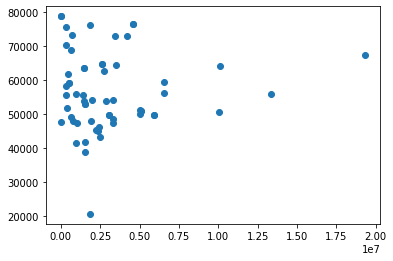

In [58]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.show()

Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [59]:
hispanic_split = us_census['Hispanic'].replace('%', '', regex=True)
us_census['Hispanic'] = pd.to_numeric(hispanic_split)
hispanic = us_census['Hispanic'].dropna()

white_split = us_census['White'].replace('%', '', regex=True)
us_census['White'] = pd.to_numeric(white_split)
white = us_census['White'].dropna()

black_split = us_census['Black'].replace('%', '', regex=True)
us_census['Black'] = pd.to_numeric(black_split)
black = us_census['Black'].dropna()

native_split = us_census['Native'].replace('%', '', regex=True)
us_census['Native'] = pd.to_numeric(native_split)
native = us_census['Native'].dropna()

asian_split = us_census['Asian'].replace('%', '', regex=True)
us_census['Asian'] = pd.to_numeric(asian_split)
asian = us_census['Asian'].dropna()

pacific_split = us_census['Pacific'].replace('%', '', regex=True)
us_census['Pacific'] = pd.to_numeric(pacific_split)
pacific = us_census['Pacific'].dropna()

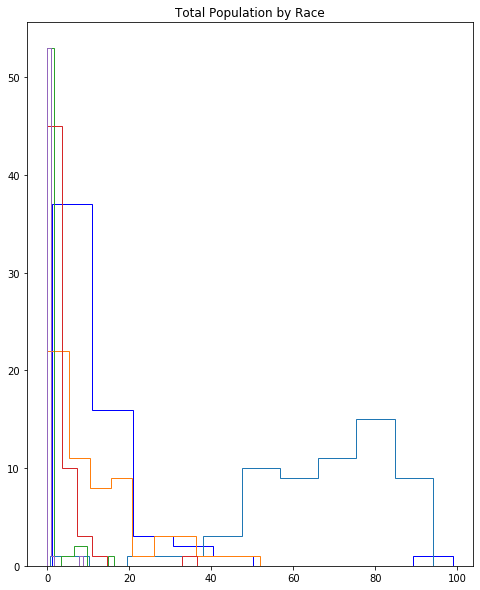

In [60]:
plt.figure(figsize=(8, 10))
plt.hist(hispanic, color='blue', histtype='step')
plt.hist(white, histtype='step')
plt.hist(black, histtype='step')
plt.hist(native, histtype='step')
plt.hist(asian, histtype='step')
plt.hist(pacific, histtype='step')
plt.title('Total Population by Race')
plt.show()